In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# create dataset
# divide it into train and test
# algorithm
    # random theta
    # hypothesis
    # cost function
    # gradient descent
# test

In [3]:
mean_01 = np.array([0.1, 0.2])
mean_02 = np.array([5.1, 3.2])

cov_01 = np.array([[0.8, 0.2],[0.2, 2.1]])
cov_02 = np.array([[0.5, 1.3],[1.3, 1.1]])

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)

print (dist_01.shape)
print (dist_02.shape)

(500, 2)
(500, 2)


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: covariance is not positive-semidefinite.
  


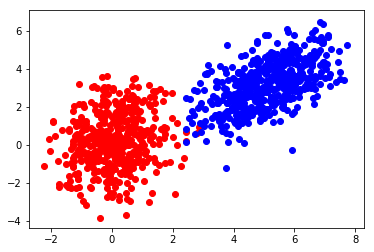

In [4]:
plt.scatter(dist_01[:,0],dist_01[:,1],c = 'r')
plt.scatter(dist_02[:,0],dist_02[:,1],c = 'b')

In [5]:
data = np.zeros((dist_01.shape[0]+dist_02.shape[0],dist_01.shape[1]+1))
print(data.shape)

(1000, 3)


In [6]:
data[:dist_01.shape[0],:dist_01.shape[1]] = dist_01 
data[dist_01.shape[0]:,:dist_01.shape[1]] = dist_02

In [7]:
data[dist_01.shape[0]:,-1] = 1.0

In [8]:
print(data)

[[-1.06474437 -2.20744354  0.        ]
 [-0.33924645  2.12777771  0.        ]
 [-0.12436232  1.69171755  0.        ]
 ...
 [ 5.37010437  3.94220666  1.        ]
 [ 5.98695647  5.80870105  1.        ]
 [ 6.64335809  2.1447449   1.        ]]


In [9]:
np.random.shuffle(data)
print(data)

[[ 4.80096659  3.80180343  1.        ]
 [ 1.56060942 -1.07280616  0.        ]
 [ 0.8769506   1.74811578  0.        ]
 ...
 [ 6.30319711  5.24475529  1.        ]
 [-0.16394725  1.75113028  0.        ]
 [ 1.97321603  2.73713709  0.        ]]


In [10]:
split = int(0.8 * data.shape[0])
train_x = data[:split,:-1]
train_y = data[:split,-1]


test_x = data[split:,:-1]
test_y = data[split:,-1]

print(train_x.shape,train_y.shape)
print(test_x.shape,train_y.shape)

(800, 2) (800,)
(200, 2) (800,)


In [12]:
'''Functions'''
def sigmoid(z):
    sig = 1.0/(1 + np.exp(-1*z))
    return sig

def hypothesis(x_sample, w, b):
    h = (x_sample*w).sum() + b
    return sigmoid(h)
    
def get_error(x, w, y_true, b):
    err = 0.0
    m = x.shape[0]
    
    for ix in range(m):
        if y_true[ix] == 0:
            #print hypothesis(x[ix], w, b)
            add_term = -1*(np.log(1 - hypothesis(x[ix], w, b)))
            err += add_term
        else:
            add_term = -1*(np.log(hypothesis(x[ix], w, b)))
            err += add_term
    
    err = err/m
    return err
def get_gradients(x, w, y_true, b):
    
    grad_w = np.zeros(w.shape[0])
    grad_b = 0
    
    m = x.shape[0]
    for ix in range(m):
        grad_w += (hypothesis(x[ix], w, b) - y_true[ix])*(x[ix])
        grad_b += (hypothesis(x[ix], w, b) - y_true[ix])*(1)
    
    return [grad_w, grad_b]

In [13]:
def optimizer(x, w, y_true, b, learning_rate=0.001):
    error = get_error(x, w, y_true, b)
    
    [grad_w, grad_b] = get_gradients(x, w, y_true, b)
    
    b = b - learning_rate*grad_b
    w = w - learning_rate*grad_w
    
    return error, w, b
def Logistic_Regression(X_train, Y_train, nb_epochs=500, 
                        learning_rate=0.0001):
    
    loss = []
    
    ## Parameter Initialisation
    W = np.array([0.3, 0.2])
    b = 3.6
    
    for ix in range(nb_epochs):
        error, W, b = optimizer(X_train, W, Y_train, b, learning_rate)
        loss.append(error)
        
    W_final = W
    b_final = b
    
    return loss, W_final, b_final

In [14]:
loss_logs, W_final, b_final = Logistic_Regression(train_x, train_y)

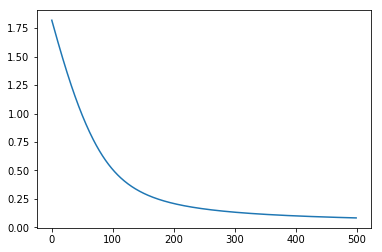

In [15]:
plt.plot(loss_logs)
plt.show()

In [16]:
print(W_final)

[1.32125748 0.11175591]


In [17]:
print(b_final)

-2.6114672280823723
